# Clone code từ github

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AE0KaCADaV4rukUKtu44D-r409EhisyhFgUA98kXTDr1mk4v7iiaxM
Mounted at /content/drive


In [ ]:
!git clone https://github.com/hiennguyen9874/person_attribute_recognition.git
!\cp -r /content/person_attribute_recognition/* /content/
!rm -rf sample_data
!rm -rf person_attribute_recognition


Cloning into 'person_attribute_recognition'...
remote: Enumerating objects: 543, done.
remote: Counting objects: 100% (543/543), done.
remote: Compressing objects: 100% (361/361), done.
remote: Total 3041 (delta 334), reused 360 (delta 178), pack-reused 2498
Receiving objects: 100% (3041/3041), 22.75 MiB | 30.49 MiB/s, done.
Resolving deltas: 100% (2069/2069), done.


In [ ]:
!pip3 install --upgrade efficientnet_pytorch
!pip3 install --upgrade albumentations==0.4.6

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.0-cp36-none-any.whl size=16031 sha256=0ab87584ef92248e06d74014b9d6a49a3145bf14c59b3afe8ea8c9058058997c
  Stored in directory: /root/.cache/pip/wheels/e9/c6/e1/7a808b26406239712cfce4b5ceeb67d9513ae32aa4b31445c6
Successfully built efficientnet-pytorch
     |████████████████████████████████| 122kB 4.4MB/s 
     |████████████████████████████████| 952kB 8.7MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=65165 sha256=0ada37653acecc7fbc2bce35a86bae44d636e161cbfba4657934afc250877171
  Stored in directory: /root/.cache/pip/wheels/c7/f4/89/56d1bee5c421c36c1a951eeb4adcc32fbb82f5344c086efa14
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentation

In [ ]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash 
! apt install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-d

# Phương pháp đánh giá
Các phương pháp đánh giá được tham khảo trong phần 4.1 evaluation methods của bài báo [A Richly  Dataset for Pedestrian Attribute Recognition](https://arxiv.org/pdf/1603.07054.pdf)
- Label-based
    - mean accuracy (mA)
- example-based
    - accuracy
    - precision
    - recall
    - f1-score

# Epoch training
Training theo epoch

## PETA


### resnet50 + CEL_Sigmoid

In [ ]:
%%writefile /content/config.yml
base: /content/config/base_epoch.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: peta
  image_size: [256, 192]
  batch_size: 64
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: CEL_Sigmoid

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: WarmupMultiStepLR
  steps: [30, 60, 90]
  gamma: 0.1
  warmup_factor: 0.01
  warmup_iters: 10

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120

Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0731_232453/model_best_accuracy.pth"

2020-09-09 08:48:01.472979: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0731_232453/model_best_accuracy.pth ...
100% 119/119 [00:43<00:00,  2.72it/s]
instance-based metrics:
accuracy: 0.8005
precision: 0.8827
recall: 0.8621
f1_score: 0.8697
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
        accessoryHat      9.54     98.18     93.81     92.23     88.41     90.28
    accessoryMuffler      8.32     99.11     96.42     95.93      93.2     94.54
    accessoryNothing     75.55     92.68     87.59     93.09     97.56     95.27
 accessorySunglasses      2.87     97.88     70.64      72.8     41.74     53.06
            hairLong     23.74     94.51     92.05    

### resnet50 + BCE

In [ ]:
%%writefile /content/config.yml
base: /content/config/base_epoch.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: peta
  image_size: [256, 192]
  batch_size: 32
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: Non_BCEWithLogitsLoss

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: WarmupCosineAnnealingLR
  delay_iters: 30

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120 

Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0726_110949/model_best_accuracy.pth"

2020-09-09 08:49:03.699684: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0726_110949/model_best_accuracy.pth ...
100% 238/238 [00:44<00:00,  5.34it/s]
instance-based metrics:
accuracy: 0.7634
precision: 0.8722
recall: 0.8240
f1_score: 0.8434
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
        accessoryHat      9.54     98.16     91.83     96.21      84.0     89.69
    accessoryMuffler      8.32     98.96      94.4     98.42     88.92     93.43
    accessoryNothing     75.55     91.53     85.64     92.06     97.16     94.54
 accessorySunglasses      2.87      97.3     56.32     65.12     12.84     21.46
            hairLong     23.74     93.13     89.39    

### osnet + CEL_Sigmoid

In [ ]:
%%writefile /content/config.yml
base: /content/config/base_epoch.yml

model:
  backbone: osnet
  pooling: gem_pooling
  head: ReductionHead
  bn_where: before
  use_tqdm: True

data:
  data_dir: datasets
  name: peta
  image_size: [256, 192]
  batch_size: 32
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: CEL_Sigmoid

lr_scheduler:
  enable: True
  name: WarmupCosineAnnealingLR
  delay_iters: 30

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120


Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0725_055423/model_best_accuracy.pth"

2020-09-09 08:50:06.306243: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0725_055423/model_best_accuracy.pth ...
100% 238/238 [00:44<00:00,  5.31it/s]
instance-based metrics:
accuracy: 0.7303
precision: 0.8382
recall: 0.8067
f1_score: 0.8182
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
        accessoryHat      9.54     97.45     89.71     92.08     80.14     85.69
    accessoryMuffler      8.32     98.68     94.17     95.08     88.77     91.82
    accessoryNothing     75.55     89.33     83.96     91.67     94.46     93.04
 accessorySunglasses      2.87     96.83     61.86     41.22     24.77     30.95
            hairLong     23.74     91.37     87.97    

### osnet + BCE

In [ ]:
%%writefile /content/config.yml
base: /content/config/base_epoch.yml

model:
  backbone: osnet
  pooling: gem_pooling
  head: ReductionHead
  bn_where: before
  use_tqdm: True

data:
  data_dir: datasets
  name: peta
  image_size: [256, 192]
  batch_size: 32
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: Non_BCEWithLogitsLoss

lr_scheduler:
  enable: True
  name: WarmupCosineAnnealingLR
  delay_iters: 30

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120


Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0730_195221/model_best_accuracy.pth"

2020-09-09 08:51:00.864786: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0730_195221/model_best_accuracy.pth ...
100% 238/238 [00:43<00:00,  5.45it/s]
instance-based metrics:
accuracy: 0.6747
precision: 0.8558
recall: 0.7293
f1_score: 0.7792
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
        accessoryHat      9.54     96.88     85.69     94.04     71.86     81.47
    accessoryMuffler      8.32     98.03     89.93      95.3     80.22     87.11
    accessoryNothing     75.55     89.75     81.26     89.53     97.88     93.52
 accessorySunglasses      2.87     97.13      50.0       0.0       0.0       0.0
            hairLong     23.74     89.99     83.49    

### efficientnet-b5 + CEL_Sigmoid

In [ ]:
%%writefile /content/config.yml
base: /content/config/base_epoch.yml

model:
  backbone: efficientnet-b5
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  image_size: [456, 228]
  batch_size: 16

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: CEL_Sigmoid

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: WarmupMultiStepLR
  steps: [30, 60, 90]
  gamma: 0.1
  warmup_factor: 0.01
  warmup_iters: 10

trainer:
  n_gpu: 1
  epochs: 120 
  
trainer_colab:
  epochs: 120 

Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0820_000952/model_best_accuracy.pth"

2020-09-09 08:51:54.908202: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Copying data...
Copied!
Loaded pretrained weights for efficientnet-b5
Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0820_000952/model_best_accuracy.pth ...
100% 475/475 [04:24<00:00,  1.79it/s]
instance-based metrics:
accuracy: 0.8017
precision: 0.8886
recall: 0.8606
f1_score: 0.8715
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
        accessoryHat      9.54     98.51      94.0     95.67     88.41      91.9
    accessoryMuffler      8.32     99.22     95.76     98.97     91.61     95.15
    accessoryNothing     75.55     92.97     88.01      93.3     97.72     95.46
 accessorySunglasses      2.87     97.66     61.85     81.25     23.85     36.88
           

### efficientnet-b4 + CEL_Sigmoid

In [ ]:
%%writefile /content/config.yml
base: /content/config/base_epoch.yml

model:
  backbone: efficientnet-b4
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  image_size: [456, 228]
  batch_size: 16

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: CEL_Sigmoid

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: WarmupMultiStepLR
  steps: [30, 60, 90]
  gamma: 0.1
  warmup_factor: 0.01
  warmup_iters: 10

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120

Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0820_113155/model_last.pth"

## PA-100K

### resnet50 + CEL_Sigmoid

In [ ]:
%%writefile /content/config.yml
base: /content/config/base_epoch.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: pa_100k
  image_size: [256, 128]
  batch_size: 32
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: CEL_Sigmoid

freeze:
  enable: False
  layers: [backbone]    
  epochs: 10

lr_scheduler:
  enable: True
  name: ReduceLROnPlateau
  factor: 0.1
  patience: 5
  min_lr: 0.0000001

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120

Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0730_142502/model_best_accuracy.pth"

2020-09-09 08:56:52.133694: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0730_142502/model_best_accuracy.pth ...
100% 313/313 [00:43<00:00,  7.25it/s]
instance-based metrics:
accuracy: 0.7892
precision: 0.8816
recall: 0.8631
f1_score: 0.8682
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
              Female      2.87     97.32     66.67     55.37     34.15     42.24
           AgeOver60     24.64     88.92     85.56     76.76     78.94     77.83
            Age18-60     44.07     91.09     90.96     89.88      89.9     89.89
           AgeLess18     55.93     91.09     90.96     92.04     92.03     92.03
               Front      6.35     96.76     90.71    

### resnet50 + BCE

In [ ]:
%%writefile /content/config.yml
base: /content/config/base_epoch.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: pa_100k
  image_size: [256, 128]
  batch_size: 32
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: Non_BCEWithLogitsLoss

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: WarmupMultiStepLR
  gamma: 0.1
  milestones: [30, 40, 50]
  warmup_factor: 0.01
  warmup_iters: 10

trainer:
  n_gpu: 1
  epochs: 60
  
trainer_colab:
  epochs: 60

Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0805_122353/model_best_accuracy.pth"

2020-09-09 08:58:02.980876: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0805_122353/model_best_accuracy.pth ...
100% 313/313 [00:41<00:00,  7.48it/s]
instance-based metrics:
accuracy: 0.7687
precision: 0.8938
recall: 0.8260
f1_score: 0.8539
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
              Female      2.87     97.61     61.74     77.27     23.69     36.27
           AgeOver60     24.64     88.72     81.81      83.0     68.18     74.87
            Age18-60     44.07     89.58     89.74     86.08     91.08     88.51
           AgeLess18     55.93     89.58     89.74     92.64      88.4     90.47
               Front      6.35      96.9     81.17    

### osnet + CEL_Sigmoid

In [ ]:
%%writefile /content/config.yml
base: /content/config/base_epoch.yml

model:
  backbone: osnet
  pooling: gem_pooling
  head: ReductionHead
  bn_where: before
  use_tqdm: True

data:
  data_dir: datasets
  name: pa_100k
  image_size: [256, 128]
  batch_size: 32
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: CEL_Sigmoid

lr_scheduler:
  enable: True
  name: WarmupCosineAnnealingLR
  delay_iters: 30

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120


Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0809_122045/model_best_accuracy.pth"

2020-09-09 09:04:21.807319: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0809_122045/model_best_accuracy.pth ...
100% 313/313 [00:38<00:00,  8.20it/s]
instance-based metrics:
accuracy: 0.7427
precision: 0.8522
recall: 0.8314
f1_score: 0.8366
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
              Female      2.87     97.47     61.33     67.35      23.0     34.29
           AgeOver60     24.64     84.97     83.85     65.69     81.66     72.81
            Age18-60     44.07     88.85     88.91     85.84     89.45     87.61
           AgeLess18     55.93     88.85     88.91      91.4     88.38     89.86
               Front      6.35      96.4     81.49     75

### osnet + BCE

In [ ]:
%%writefile /content/config.yml
base: /content/config/base_epoch.yml

model:
  backbone: osnet
  pooling: gem_pooling
  head: ReductionHead
  bn_where: before
  use_tqdm: True

data:
  data_dir: datasets
  name: pa_100k
  image_size: [256, 128]
  batch_size: 32
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: Non_BCEWithLogitsLoss

lr_scheduler:
  enable: True
  name: WarmupCosineAnnealingLR
  delay_iters: 30

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120


Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0819_161203/model_best_accuracy.pth"

2020-09-09 09:05:28.924525: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0819_161203/model_best_accuracy.pth ...
100% 313/313 [00:37<00:00,  8.35it/s]
instance-based metrics:
accuracy: 0.7146
precision: 0.8903
recall: 0.7649
f1_score: 0.8167
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
              Female      2.87     97.37     54.69      90.0      9.41     17.03
           AgeOver60     24.64     85.04     72.54     84.77     47.89      61.2
            Age18-60     44.07     87.65     87.68     84.64     87.93     86.25
           AgeLess18     55.93     87.65     87.68     90.19     87.43     88.79
               Front      6.35      95.8     67.96     94

## PPE

In [ ]:
!mkdir -p /content/datasets/ppe/raw
!\cp  /content/drive/"My Drive"/Private_Datasets/ppe.zip datasets/ppe/raw/

### resnet50 + CEL_Sigmoid

In [ ]:
%%writefile /content/config.yml
base: /content/config/base_epoch.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: ppe_two
  image_size: [256, 256]
  batch_size: 32
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: CEL_Sigmoid

freeze:
  enable: False
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: ReduceLROnPlateau
  factor: 0.1
  patience: 5
  min_lr: 0.0000001

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120

Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0804_164021/model_best_accuracy.pth"

2020-09-09 09:48:57.799791: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Loading checkpoint: /content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0804_164021/model_best_accuracy.pth ...
100% 33/33 [00:08<00:00,  3.86it/s]
instance-based metrics:
accuracy: 0.8520
precision: 0.8814
recall: 0.9051
f1_score: 0.8795
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
            hard_hat     76.28     85.01      74.6     87.04      94.4     90.57
         safety_vest     90.42     89.09     51.48     90.68     98.01      94.2
                   -         -         -         -         -         -         -
                mean         -     87.05     63.04     88.86      96.2     92.39


### resnet50 + BCE

In [ ]:
%%writefile /content/config.yml
base: /content/config/base_epoch.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: ppe_two
  image_size: [256, 256]
  batch_size: 32
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Non_BCEWithLogitsLoss

freeze:
  enable: False
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: ReduceLROnPlateau
  factor: 0.1
  patience: 5
  min_lr: 0

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120

Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0805_101913/model_best_accuracy.pth"

2020-09-09 09:50:23.008785: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Loading checkpoint: /content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0805_101913/model_best_accuracy.pth ...
100% 33/33 [00:08<00:00,  3.85it/s]
instance-based metrics:
accuracy: 0.8482
precision: 0.8771
recall: 0.9046
f1_score: 0.8767
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
            hard_hat     76.28     83.78     74.07     87.02     92.54     89.69
         safety_vest     90.42     90.23     50.78     90.55     99.58     94.85
                   -         -         -         -         -         -         -
                mean         -      87.0     62.42     88.79     96.06     92.27


### osnet + CEL_Sigmoid

In [ ]:
%%writefile /content/config.yml
base: /content/config/base_epoch.yml

model:
  backbone: osnet
  pooling: gem_pooling
  head: ReductionHead
  bn_where: before
  use_tqdm: True

data:
  data_dir: datasets
  name: ppe_two
  image_size: [256, 256]
  batch_size: 32
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: CEL_Sigmoid

lr_scheduler:
  enable: True
  name: WarmupCosineAnnealingLR
  delay_iters: 30

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120


Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0805_125311/model_best_accuracy.pth"

2020-09-09 09:50:51.947742: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Loading checkpoint: /content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0805_125311/model_best_accuracy.pth ...
100% 33/33 [00:08<00:00,  4.03it/s]
instance-based metrics:
accuracy: 0.8340
precision: 0.8790
recall: 0.8828
f1_score: 0.8653
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
            hard_hat     76.28     80.17     71.29     86.15     88.18     87.15
         safety_vest     90.42     90.61     55.86     91.46     98.85     95.01
                   -         -         -         -         -         -         -
                mean         -     85.39     63.58      88.8     93.51     91.08


### osnet + BCE

In [ ]:
%%writefile /content/config.yml
base: /content/config/base_epoch.yml

model:
  backbone: osnet
  pooling: gem_pooling
  head: ReductionHead
  bn_where: before
  use_tqdm: True

data:
  data_dir: datasets
  name: ppe_two
  image_size: [256, 256]
  batch_size: 32
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: Non_BCEWithLogitsLoss

lr_scheduler:
  enable: True
  name: WarmupCosineAnnealingLR
  delay_iters: 30

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120


Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0805_101801/model_best_accuracy.pth"

2020-09-09 09:51:11.558276: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Loading checkpoint: /content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0805_101801/model_best_accuracy.pth ...
100% 33/33 [00:07<00:00,  4.14it/s]
instance-based metrics:
accuracy: 0.8254
precision: 0.8733
recall: 0.8724
f1_score: 0.8571
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
            hard_hat     76.28     78.46     68.66     84.89     87.31     86.08
         safety_vest     90.42     89.18     51.53     90.69     98.11     94.25
                   -         -         -         -         -         -         -
                mean         -     83.82     60.09     87.79     92.71     90.17


## Wider

### resnet50 + CEL_Sigmoid

In [ ]:
%%writefile /content/config.yml
base: /content/config/base_epoch.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: wider
  image_size: [256, 128]
  batch_size: 32
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: CEL_Sigmoid
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: ReduceLROnPlateau
  factor: 0.1
  patience: 10
  min_lr: 0

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120

Overwriting /content/config.yml


In [ ]:
 !python3 test.py --config /content/config.yml --resume "/content/drive/Shared drives/REID/HIEN/Models/person_attribute_recognition/checkpoints/0808_124659/model_best_accuracy.pth"

2020-09-09 10:07:41.035334: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Copying data...
Copied!
Traceback (most recent call last):
  File "test.py", line 124, in <module>
    main(config)
  File "test.py", line 31, in main
    datamanager, _ = build_datamanager(config['type'], config['data'])
  File "/content/data/datamanager.py", line 212, in build_datamanager
    return DataManger_Epoch(config, **kwargs), dict_paramsters
  File "/content/data/datamanager.py", line 41, in __init__
    super(DataManger_Epoch, self).__init__(config)
  File "/content/data/datamanager.py", line 27, in __init__
    use_tqdm=config['use_tqdm'])
  File "/content/data/image/__init__.py", line 16, in build_datasource
    return __datasets[name](root_dir, download, extract, use_tqdm)
  File "/content/data/image/wider.py", line 43, in __init__
    self.data['train'], attribute_train, self.weight['train'] = self._processes_dir(os.path.join(

# Episode training
Training theo episode

## PETA

### (**Sampler88**): Random 8 attribute, mỗi attribute random 8 mẫu dương, 8 mẫu âm.
Mỗi episode random theo phân phối đều ra 8 attribute, trong mỗi attribute random ra 8 mẫu dương và 8 mẫu âm.

In [ ]:
%%writefile /content/config.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  image_size: [256, 192]
  train:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 700
  val:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: CosineAnnealingLR
  max_iters: 120
  eta_min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 200
    
trainer_colab:
  epochs: 200

Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume  "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth"

2020-09-09 08:59:40.868214: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth ...
100% 60/60 [00:42<00:00,  1.41it/s]
instance-based metrics:
accuracy: 0.7921
precision: 0.8529
recall: 0.8805
f1_score: 0.8638
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
        accessoryHat      9.54     97.91      94.4     88.24     90.07     89.15
    accessoryMuffler      8.32     99.18     96.39     97.03     93.04     94.99
    accessoryNothing     75.55     92.66     87.91     93.36      97.2     95.24
 accessorySunglasses      2.87     96.12     77.97     38.44     58.72     46.46
            hairLong     23.74     94.01     92.49     85.82     89.

### Thay đổi cách chọn số mẫu dương và số mẫu âm

#### (**Sampler610**) Lấy ngẫu nhiên 6 mẫu dương và 10 mẫu âm
Mỗi episode random theo phân phối đều ra 8 attribute, trong mỗi attribute random ra 6 mẫu dương và 10 mẫu âm.

##### Kết quả

In [ ]:
%%writefile /content/config.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  image_size: [256, 192]
  train:
    num_attribute: 8
    num_positive: 6
    num_negative: 10
    num_iterator: 700
  val:
    num_attribute: 8
    num_positive: 6
    num_negative: 10
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: ReduceLROnPlateau
  factor: 0.1
  patience: 10
  min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 200
    
trainer_colab:
  epochs: 200

Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0811_130848/model_best_accuracy.pth"

2020-09-09 09:00:40.294554: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0811_130848/model_best_accuracy.pth ...
100% 60/60 [00:42<00:00,  1.41it/s]
instance-based metrics:
accuracy: 0.7787
precision: 0.8562
recall: 0.8566
f1_score: 0.8533
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
        accessoryHat      9.54     97.91     94.77     87.63      90.9     89.23
    accessoryMuffler      8.32     99.01      96.8      94.0     94.15     94.07
    accessoryNothing     75.55     90.55     88.31     94.68      92.7     93.68
 accessorySunglasses      2.87      97.0      78.2     48.11     58.26      52.7
            hairLong     23.74     93.74      92.0     85.4

##### So sánh với sampler88
So sánh với cách lấy mẫu sampler88

In [ ]:
%%writefile /content/config1.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  image_size: [256, 192]
  train:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 700
  val:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: CosineAnnealingLR
  max_iters: 120
  eta_min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 200
    
trainer_colab:
  epochs: 200

Overwriting /content/config1.yml


In [ ]:
%%writefile /content/config2.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  image_size: [256, 192]
  train:
    num_attribute: 8
    num_positive: 6
    num_negative: 10
    num_iterator: 700
  val:
    num_attribute: 8
    num_positive: 6
    num_negative: 10
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: ReduceLROnPlateau
  factor: 0.1
  patience: 10
  min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 200
    
trainer_colab:
  epochs: 200

Overwriting /content/config2.yml


In [ ]:
import argparse
import os
import logging
import torch
import numpy as np

from tqdm import tqdm
from easydict import EasyDict

from models import build_model
from data import build_datamanager
from logger import setup_logging
from utils import read_config, rmdir, summary, array_interweave, COLOR
from evaluators import recognition_metrics
from evaluators.recognition_metrics import log_test, compare_class_based, test

config1 = "config1.yml"
config2 = "config2.yml"

resume1 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth"
resume2 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0811_130848/model_best_accuracy.pth"

config1 = read_config(config1)
config1.update({'resume': resume1})
config1.update({'colab': True})

config2 = read_config(config2)
config2.update({'resume': resume2})
config2.update({'colab': True})

datamanager1, _ = build_datamanager(config1['type'], config1['data'])
datamanager2, _ = build_datamanager(config2['type'], config2['data'])

# model1
result_label1, result_instance1 = test(config1, datamanager1, print)

# model 2
result_label2, result_instance2 = test(config2, datamanager2, print)
print()
compare_class_based(print, datamanager1.datasource.get_attribute(), datamanager1.datasource.get_weight('test'), result_label1, result_label2, COLOR.BLUE)
print()
print('trái: 8 attribute, 8 positive, 8 negative; phải: 8 attribute, 6 positive, 10 negative')

Copying data...
Copied!
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth ...



Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0811_130848/model_best_accuracy.pth ...




           attribute      weight       accuracy          mA           precision        recall          f1_score
                   -           -              -           -                   -             -                 -
        accessoryHat        9.54     97.91|97.91      94.4|94.77     88.24|87.63     90.07| 90.9     89.15|89.23
    accessoryMuffler        8.32     99.18|99.01     96.39| 96.8     97.03| 94.0     93.04|94.15     94.99|94.07
    accessoryNothing       75.55     92.66|90.55     87.91|88.31     93.36|94.68      97.2| 92.7     95.24|93.68
 accessorySunglasses        2.87     96.12| 97.0     77.97| 78.2     38.44|48.11     58.72|58.26     46.46| 52.7
            hairLong       23.74     94.01|93.74     92.49| 92.0     85.82|85.47     89.58|88.69     87.66|87.05
     upperBodyCasual       85.46     94.38|92.53     87.33|88.76     96.19|97.09     97.27|94.07     96.73|95.56
     upperBodyFormal       13.25     95.03|95.29     88.64|88.91     82.06|83.56     79.94|80.24

#### random số mẫu dương, số mẫu âm theo trọng số của dataset **(nghịch)**
Random ra 8 attribute theo phân phối đều. Mỗi attribute sẽ chọn ngẫu nhiên ra số mẫu dương và số mẫu âm dựa theo trọng số của attribute đó trong training dataset, nếu **attribute có trọng số nhỏ** (số mẫu dương xuất hiện trong dataset ít), sẽ **chọn số mẫu dương lớn hơn** và **số mẫu âm nhỏ hơn**. **(nghịch)**

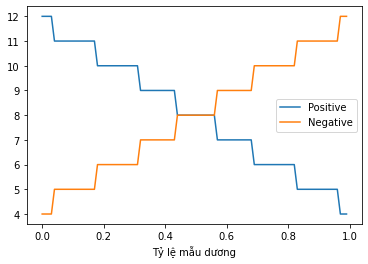

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import files

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'font.size': 16,
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

origin_weight = np.arange(0, 1, 0.01)
weight1 = np.exp(1-origin_weight)
weight2 = np.exp(origin_weight)

num_sampler = 16
num_positive = np.rint(num_sampler*weight1/(weight1+weight2))
num_negative = num_sampler - num_positive

plt.plot(origin_weight, num_positive, label='Positive')
plt.plot(origin_weight, num_negative, label='Negative')
plt.xlabel('Tỷ lệ mẫu dương')
plt.legend()
plt.savefig('pos_neg_nghich.pdf')
# files.download('pos_neg_nghich.pgf')
# plt.show()

In [ ]:
import numpy as np
from data.image import build_datasource

datasource = build_datasource('peta', '/datasets', True, True, use_tqdm=True)

weight = datasource.get_weight('train')

num_sampler = 16

weight1 = np.exp(1-weight)
weight2 = np.exp(weight)
num_positive = (num_sampler*weight1/(weight1+weight2)).astype(int)
num_negative = num_sampler - num_positive

row_format = '{:>12}' + '{:>4}'*len(weight)
print(row_format.format('weight %', *(weight*100).astype(int)))
print(row_format.format(*['-']*len(weight),'-'))
print(row_format.format('positive', *num_positive))
print(row_format.format('negative', *num_negative))

##### Kết quả

In [ ]:
%%writefile /content/config.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  image_size: [256, 192]
  sampler: RandomBatchSamplerAttributeWeight
  train:
    num_attribute: 8
    num_sampler: 16
    num_iterator: 700
  val:
    num_attribute: 8
    num_sampler: 16
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: ReduceLROnPlateau
  factor: 0.1
  patience: 10
  min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 120
    
trainer_colab:
  epochs: 120

Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0823_093622/model_best_accuracy.pth"

2020-09-09 09:10:19.116394: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0823_093622/model_best_accuracy.pth ...
100% 60/60 [00:42<00:00,  1.41it/s]
instance-based metrics:
accuracy: 0.7641
precision: 0.7991
recall: 0.9115
f1_score: 0.8455
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
        accessoryHat      9.54     97.25     94.41     82.17      90.9     86.31
    accessoryMuffler      8.32     98.42     96.55     87.65      94.3     90.85
    accessoryNothing     75.55     92.24     86.82     92.68     97.42     94.99
 accessorySunglasses      2.87      95.2     81.06      33.1     66.06      44.1
            hairLong     23.74     91.54     92.64     75.7

##### So sánh với sampler 88

In [ ]:
%%writefile /content/config1.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  image_size: [256, 192]
  train:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 700
  val:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: CosineAnnealingLR
  max_iters: 120
  eta_min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 200
    
trainer_colab:
  epochs: 200

Overwriting /content/config1.yml


In [ ]:
%%writefile /content/config2.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  sampler: RandomBatchSamplerAttributeWeight
  train:
    num_attribute: 8
    num_sampler: 16
    num_iterator: 700
  val:
    num_attribute: 8
    num_sampler: 16
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: ReduceLROnPlateau
  factor: 0.1
  patience: 10
  min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 120
    
trainer_colab:
  epochs: 120

Overwriting /content/config2.yml


In [ ]:
import argparse
import os
import logging
import torch
import numpy as np

from tqdm import tqdm
from easydict import EasyDict

from models import build_model
from data import build_datamanager
from logger import setup_logging
from utils import read_config, rmdir, summary, array_interweave, COLOR
from evaluators import recognition_metrics
from evaluators.recognition_metrics import log_test, compare_class_based, test

config1 = "config1.yml"
config2 = "config2.yml"

resume1 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth"
resume2 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0823_093622/model_best_accuracy.pth"

config1 = read_config(config1)
config1.update({'resume': resume1})
config1.update({'colab': True})

config2 = read_config(config2)
config2.update({'resume': resume2})
config2.update({'colab': True})

datamanager1, _ = build_datamanager(config1['type'], config1['data'])
datamanager2, _ = build_datamanager(config2['type'], config2['data'])

# model1
result_label1, result_instance1 = test(config1, datamanager1, print)

# model 2
result_label2, result_instance2 = test(config2, datamanager2, print)
print()
compare_class_based(print, datamanager1.datasource.get_attribute(), datamanager1.datasource.get_weight('test'), result_label1, result_label2, COLOR.BLUE)
print()
print('trái: 8 attribute, 8 positive, 8 negative; phải: 8 attribute, mỗi attribute lấy mẫu dương và mẫu âm theo trọng số của attribute đó')

Copying data...
Copied!
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth ...



Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0823_093622/model_best_accuracy.pth ...




           attribute      weight       accuracy          mA           precision        recall          f1_score
                   -           -              -           -                   -             -                 -
        accessoryHat        9.54     97.91|97.25      94.4|94.41     88.24|82.17     90.07| 90.9     89.15|86.31
    accessoryMuffler        8.32     99.18|98.42     96.39|96.55     97.03|87.65     93.04| 94.3     94.99|90.85
    accessoryNothing       75.55     92.66|92.24     87.91|86.82     93.36|92.68      97.2|97.42     95.24|94.99
 accessorySunglasses        2.87     96.12| 95.2     77.97|81.06     38.44| 33.1     58.72|66.06     46.46| 44.1
            hairLong       23.74     94.01|91.54     92.49|92.64     85.82|75.72     89.58|94.73     87.66|84.17
     upperBodyCasual       85.46     94.38|94.29     87.33|86.63     96.19|95.95     97.27|97.43     96.73|96.68
     upperBodyFormal       13.25     95.03|93.43     88.64|89.57     82.06|71.34     79.94|84.31

In [ ]:
tag = 'episode1_vs_episode3_nghich'

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

from matplotlib.patches import ConnectionPatch
from matplotlib import rcParams
from google.colab import files

mapping_label = {'accuracy': 'Accuracy', 'mean_accuracy': 'mean Accuracy', 'precision': 'Precision', 'recall': 'Recall', 'f1_score': 'F1 score'}
for metric in ['accuracy', 'mean_accuracy', 'precision', 'recall', 'f1_score']:
    fig, (ax) = plt.subplots(1, 1, sharex=True)
    alpha = result_label1[metric] > result_label2[metric]
    ax.scatter(datamanager1.datasource.get_weight('test'), result_label1[metric]*100, color='r', label='Theo phân phối đều')
    ax.scatter(datamanager1.datasource.get_weight('test'), result_label2[metric]*100, color='b', label='Theo trọng số')
    ax.legend(loc='best')
    ax.grid()
    for i in range(len(datamanager1.datasource.get_weight('test'))):
        x = datamanager1.datasource.get_weight('test')[i]
        y1 = (result_label1[metric]*100)[i]
        y2 = (result_label2[metric]*100)[i]
        color = 'r' if y1 >= y2 else 'b'
        xyA = (x, y1)
        xyB = (x, y2)
        coordsA = "data"
        coordsB = "data"
        con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA=coordsA, coordsB=coordsB, arrowstyle="-")
        ax.add_artist(con)

    # plt.show()
    ax.set_xlabel('Tỷ lệ mẫu dương')
    ax.set_ylabel('{}'.format(mapping_label[metric]))
    fig.savefig('{}_{}.pgf'.format(tag, metric), dpi=1200)
    files.download('{}_{}.pgf'.format(tag, metric))
    # fig.show()
    plt.close()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### so sánh với epoch-based training

In [ ]:
%%writefile /content/config1.yml
base: /content/config/base_epoch.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: peta
  batch_size: 64
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: CEL_Sigmoid

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: WarmupMultiStepLR
  steps: [30, 60, 90]
  gamma: 0.1
  warmup_factor: 0.01
  warmup_iters: 10

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120

Overwriting /content/config1.yml


In [ ]:
%%writefile /content/config2.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  sampler: RandomBatchSamplerAttributeWeight
  train:
    num_attribute: 8
    num_sampler: 16
    num_iterator: 700
  val:
    num_attribute: 8
    num_sampler: 16
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: ReduceLROnPlateau
  factor: 0.1
  patience: 10
  min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 120
    
trainer_colab:
  epochs: 120

Overwriting /content/config2.yml


In [ ]:
import os
import argparse
import logging
import torch
import numpy as np

from tqdm import tqdm
from easydict import EasyDict

from models import build_model
from data import build_datamanager
from logger import setup_logging
from utils import read_config, rmdir, summary, array_interweave, COLOR
from evaluators import recognition_metrics
from evaluators.recognition_metrics import log_test, compare_class_based, test

config1 = "config1.yml"
config2 = "config2.yml"

resume1 = "/content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0731_232453/model_best_accuracy.pth"
resume2 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0823_093622/model_best_accuracy.pth"

config1 = read_config(config1)
config1.update({'resume': resume1})
config1.update({'colab': True})

config2 = read_config(config2)
config2.update({'resume': resume2})
config2.update({'colab': True})

datamanager1, _ = build_datamanager(config1['type'], config1['data'])
datamanager2, _ = build_datamanager(config2['type'], config2['data'])

# model1
result_label1, result_instance1 = test(config1, datamanager1, print)

# model 2
result_label2, result_instance2 = test(config2, datamanager2, print)
print()
compare_class_based(print, datamanager1.datasource.get_attribute(), datamanager1.datasource.get_weight('test'), result_label1, result_label2, COLOR.BLUE)

Copying data...
Copied!
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0731_232453/model_best_accuracy.pth ...



Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0823_093622/model_best_accuracy.pth ...




           attribute      weight       accuracy          mA           precision        recall          f1_score
                   -           -              -           -                   -             -                 -
        accessoryHat        9.54     98.18|97.25     93.81|94.41     92.23|82.17     88.41| 90.9     90.28|86.31
    accessoryMuffler        8.32     99.11|98.42     96.42|96.55     95.93|87.65      93.2| 94.3     94.54|90.85
    accessoryNothing       75.55     92.68|92.24     87.59|86.82     93.09|92.68     97.56|97.42     95.27|94.99
 accessorySunglasses        2.87     97.88| 95.2     70.64|81.06      72.8| 33.1     41.74|66.06     53.06| 44.1
            hairLong       23.74     94.51|91.54     92.05|92.64     89.29|75.72     87.36|94.73     88.32|84.17
     upperBodyCasual       85.46      94.8|94.29     85.77|86.63     95.55|95.95     98.51|97.43     97.01|96.68
     upperBodyFormal       13.25      95.5|93.43     86.43|89.57     90.21|71.34     74.08|84.31

#### random số mẫu dương, số mẫu âm theo trọng số của dataset **(thuận)**
Random ra 8 attribute theo phân phối đều. Mỗi attribute sẽ chọn ngẫu nhiên ra số mẫu dương và số mẫu âm dựa theo trọng số của attribute đó trong training dataset, nếu **attribute có trọng số nhỏ** (số mẫu dương xuất hiện trong dataset ít), sẽ chọn **số mẫu dương nhỏ hơn** và **số mẫu âm lớn hơn**.

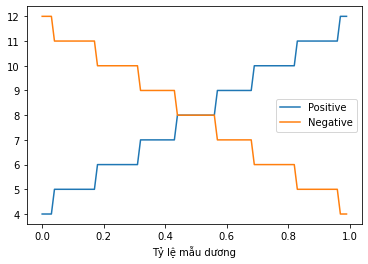

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import files

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'font.size': 16,
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

origin_weight = np.arange(0, 1, 0.01)
weight1 = np.exp(origin_weight)
weight2 = np.exp(1-origin_weight)

num_sampler = 16
num_positive = np.rint(num_sampler*weight1/(weight1+weight2))
num_negative = num_sampler - num_positive

plt.plot(origin_weight, num_positive, label='Positive')
plt.plot(origin_weight, num_negative, label='Negative')
plt.xlabel('Tỷ lệ mẫu dương')
plt.legend()
plt.savefig('pos_neg_thuan.pdf')
# files.download('pos_neg_thuan.pgf')
# plt.show()

In [ ]:
import numpy as np
from data.image import build_datasource

datasource = build_datasource('peta', '/datasets', True, True, use_tqdm=True)

weight = datasource.get_weight('train')

num_sampler = 16

weight1 = np.exp(weight)
weight2 = np.exp(1-weight)
num_positive = (num_sampler*weight1/(weight1+weight2)).astype(int)
num_negative = num_sampler - num_positive

row_format = '{:>12}' + '{:>4}'*len(weight)
print(row_format.format('weight %', *(weight*100).astype(int)))
print(row_format.format(*['-']*len(weight),'-'))
print(row_format.format('positive', *num_positive))
print(row_format.format('negative', *num_negative))

Copying data...
Copied!
    weight %  10   8  74   3  23  85  13   7   4   2  14   1   8  45   1  86  13  30   3   4  51  29   2  35  21  19  19  29  27   7  49  33  10   6  55
           -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
    positive   4   4   9   4   5  10   5   4   4   4   5   4   4   7   4  10   5   6   4   4   8   6   4   6   5   5   5   6   6   4   7   6   4   4   8
    negative  12  12   7  12  11   6  11  12  12  12  11  12  12   9  12   6  11  10  12  12   8  10  12  10  11  11  11  10  10  12   9  10  12  12   8


##### Kết quả

In [ ]:
%%writefile /content/config.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  image_size: [256, 192]
  sampler: RandomBatchSamplerAttributeWeight1
  train:
    num_attribute: 8
    num_sampler: 16
    num_iterator: 700
  val:
    num_attribute: 8
    num_sampler: 16
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: ReduceLROnPlateau
  factor: 0.1
  patience: 10
  min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 120
    
trainer_colab:
  epochs: 120

Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0823_094452/model_best_accuracy.pth"

2020-09-09 09:14:42.518505: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0823_094452/model_best_accuracy.pth ...
100% 60/60 [00:42<00:00,  1.40it/s]
instance-based metrics:
accuracy: 0.7810
precision: 0.8625
recall: 0.8534
f1_score: 0.8548
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
        accessoryHat      9.54     98.09     93.76     91.31     88.41     89.84
    accessoryMuffler      8.32     99.24     96.42     97.67     93.04      95.3
    accessoryNothing     75.55     90.47     87.47      94.0     93.35     93.67
 accessorySunglasses      2.87      96.7     76.71      44.0      55.5     49.09
            hairLong     23.74     93.82     92.32     85.2

##### So sánh với sampler88

In [ ]:
%%writefile /content/config1.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  image_size: [256, 192]
  train:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 700
  val:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: CosineAnnealingLR
  max_iters: 120
  eta_min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 200
    
trainer_colab:
  epochs: 200

Overwriting /content/config1.yml


In [ ]:
%%writefile /content/config2.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  sampler: RandomBatchSamplerAttributeWeight1
  train:
    num_attribute: 8
    num_sampler: 16
    num_iterator: 700
  val:
    num_attribute: 8
    num_sampler: 16
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: ReduceLROnPlateau
  factor: 0.1
  patience: 10
  min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 120
    
trainer_colab:
  epochs: 120

Overwriting /content/config2.yml


In [ ]:
import argparse
import os
import logging
import torch
import numpy as np

from tqdm import tqdm
from easydict import EasyDict

from models import build_model
from data import build_datamanager
from logger import setup_logging
from utils import read_config, rmdir, summary, array_interweave, COLOR
from evaluators import recognition_metrics
from evaluators.recognition_metrics import log_test, compare_class_based, test

config1 = "config1.yml"
config2 = "config2.yml"

resume1 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth"
resume2 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0823_094452/model_best_accuracy.pth"

config1 = read_config(config1)
config1.update({'resume': resume1})
config1.update({'colab': True})

config2 = read_config(config2)
config2.update({'resume': resume2})
config2.update({'colab': True})

datamanager1, _ = build_datamanager(config1['type'], config1['data'])
datamanager2, _ = build_datamanager(config2['type'], config2['data'])

# model1
result_label1, result_instance1 = test(config1, datamanager1, print)

# model 2
result_label2, result_instance2 = test(config2, datamanager2, print)
print()
compare_class_based(print, datamanager1.datasource.get_attribute(), datamanager1.datasource.get_weight('test'), result_label1, result_label2, COLOR.BLUE)
print()
print()

Copying data...
Copied!
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth ...



Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0823_094452/model_best_accuracy.pth ...




           attribute      weight       accuracy          mA           precision        recall          f1_score
                   -           -              -           -                   -             -                 -
        accessoryHat        9.54     97.91|98.09      94.4|93.76     88.24|91.31     90.07|88.41     89.15|89.84
    accessoryMuffler        8.32     99.18|99.24     96.39|96.42     97.03|97.67     93.04|93.04     94.99| 95.3
    accessoryNothing       75.55     92.66|90.47     87.91|87.47     93.36| 94.0      97.2|93.35     95.24|93.67
 accessorySunglasses        2.87     96.12| 96.7     77.97|76.71     38.44| 44.0     58.72| 55.5     46.46|49.09
            hairLong       23.74     94.01|93.82     92.49|92.32     85.82|85.22     89.58|89.47     87.66|87.29
     upperBodyCasual       85.46     94.38|93.58     87.33|88.24     96.19|96.69     97.27|95.77     96.73|96.23
     upperBodyFormal       13.25     95.03|95.59     88.64| 86.9     82.06| 90.0     79.94|75.07

In [ ]:
tag = 'episode1_vs_episode3_thuan'

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

from matplotlib.patches import ConnectionPatch
from matplotlib import rcParams
from google.colab import files

mapping_label = {'accuracy': 'Accuracy', 'mean_accuracy': 'mean Accuracy', 'precision': 'Precision', 'recall': 'Recall', 'f1_score': 'F1 score'}
for metric in ['accuracy', 'mean_accuracy', 'precision', 'recall', 'f1_score']:
    fig, (ax) = plt.subplots(1, 1, sharex=True)
    alpha = result_label1[metric] > result_label2[metric]
    ax.scatter(datamanager1.datasource.get_weight('test'), result_label1[metric]*100, color='r', label='Theo phân phối đều')
    ax.scatter(datamanager1.datasource.get_weight('test'), result_label2[metric]*100, color='b', label='Theo trọng số')
    ax.legend(loc='best')
    ax.grid()
    for i in range(len(datamanager1.datasource.get_weight('test'))):
        x = datamanager1.datasource.get_weight('test')[i]
        y1 = (result_label1[metric]*100)[i]
        y2 = (result_label2[metric]*100)[i]
        color = 'r' if y1 >= y2 else 'b'
        xyA = (x, y1)
        xyB = (x, y2)
        coordsA = "data"
        coordsB = "data"
        con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA=coordsA, coordsB=coordsB, arrowstyle="-")
        ax.add_artist(con)

    # plt.show()
    ax.set_xlabel('Tỷ lệ mẫu dương')
    ax.set_ylabel('{}'.format(mapping_label[metric]))
    fig.savefig('{}_{}.pgf'.format(tag, metric), dpi=1200)
    files.download('{}_{}.pgf'.format(tag, metric))
    # fig.show()
    plt.close()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### so sánh với epoch-based training

In [ ]:
%%writefile /content/config1.yml
base: /content/config/base_epoch.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: peta
  batch_size: 64
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: CEL_Sigmoid

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: WarmupMultiStepLR
  steps: [30, 60, 90]
  gamma: 0.1
  warmup_factor: 0.01
  warmup_iters: 10

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120

Overwriting /content/config1.yml


In [ ]:
%%writefile /content/config2.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  sampler: RandomBatchSamplerAttributeWeight1
  train:
    num_attribute: 8
    num_sampler: 16
    num_iterator: 700
  val:
    num_attribute: 8
    num_sampler: 16
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: ReduceLROnPlateau
  factor: 0.1
  patience: 10
  min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 120
    
trainer_colab:
  epochs: 120

Overwriting /content/config2.yml


In [ ]:
import os
import argparse
import logging
import torch
import numpy as np

from tqdm import tqdm
from easydict import EasyDict

from models import build_model
from data import build_datamanager
from logger import setup_logging
from utils import read_config, rmdir, summary, array_interweave, COLOR
from evaluators import recognition_metrics
from evaluators.recognition_metrics import log_test, compare_class_based, test

config1 = "config1.yml"
config2 = "config2.yml"

resume1 = "/content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0731_232453/model_best_accuracy.pth"
resume2 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0823_094452/model_best_accuracy.pth"

config1 = read_config(config1)
config1.update({'resume': resume1})
config1.update({'colab': True})

config2 = read_config(config2)
config2.update({'resume': resume2})
config2.update({'colab': True})

datamanager1, _ = build_datamanager(config1['type'], config1['data'])
datamanager2, _ = build_datamanager(config2['type'], config2['data'])

# model1
result_label1, result_instance1 = test(config1, datamanager1, print)

# model 2
result_label2, result_instance2 = test(config2, datamanager2, print)
print()
compare_class_based(print, datamanager1.datasource.get_attribute(), datamanager1.datasource.get_weight('test'), result_label1, result_label2, COLOR.BLUE)

Copying data...
Copied!
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0731_232453/model_best_accuracy.pth ...



Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0823_094452/model_best_accuracy.pth ...




           attribute      weight       accuracy          mA           precision        recall          f1_score
                   -           -              -           -                   -             -                 -
        accessoryHat        9.54     98.18|98.09     93.81|93.76     92.23|91.31     88.41|88.41     90.28|89.84
    accessoryMuffler        8.32     99.11|99.24     96.42|96.42     95.93|97.67      93.2|93.04     94.54| 95.3
    accessoryNothing       75.55     92.68|90.47     87.59|87.47     93.09| 94.0     97.56|93.35     95.27|93.67
 accessorySunglasses        2.87     97.88| 96.7     70.64|76.71      72.8| 44.0     41.74| 55.5     53.06|49.09
            hairLong       23.74     94.51|93.82     92.05|92.32     89.29|85.22     87.36|89.47     88.32|87.29
     upperBodyCasual       85.46      94.8|93.58     85.77|88.24     95.55|96.69     98.51|95.77     97.01|96.23
     upperBodyFormal       13.25      95.5|95.59     86.43| 86.9     90.21| 90.0     74.08|75.07

### Thay đổi cách chọn attribute

#### random attribute theo phân phối multinomial **(nghịch)**
random attribute dựa theo trọng số của từng attribute đó. những **attribute có trọng số nhỏ** sẽ được **random ra nhiều hơn**, những **attribute có trọng số lớn** sẽ được **random ra ít hơn**. Mỗi attribute vẫn sẽ random ra 8 mẫu dương và 8 mẫu âm. **nghịch**

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from google.colab import files

origin_weight = np.arange(0, 1, 0.02)
weight = np.exp(1-origin_weight)
weight = weight / np.sum(weight)
print(len(weight))

result = torch.zeros(len(weight), dtype=torch.float)
for x in range(1000000):
    sampler = torch.multinomial(torch.tensor(weight), 8, replacement=True)
    result[sampler] += 1
# result /= torch.sum(result)
result = result.numpy()

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(origin_weight, result)
ax.set_xlabel('Tỷ lệ mẫu dương')
ax.set_ylabel('số lần xuất hiện')
ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.1e'))
# plt.show()
plt.savefig('attribute.pdf', dpi=1200)
files.download('attribute.pdf')

50


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch
import numpy as np
from scipy.special import softmax
from data.image import build_datasource

datasource = build_datasource('peta', '/datasets', True, True, use_tqdm=True)

origin_weight = datasource.get_weight('train')
# print(origin_weight)
weight = np.exp(1-np.array(origin_weight))
weight = weight / np.sum(np.exp(np.array(origin_weight)))

result = torch.zeros(len(weight), dtype=torch.float)
for x in range(1000000):
    sampler = torch.multinomial(torch.tensor(weight), 8, replacement=True)
    result[sampler] += 1
# result /= torch.sum(result)

result *= 100
result =  result.numpy().astype(int)
row_format = '{:>12}' + '{:>4}'*len(weight)
print(row_format.format('weight %', *(origin_weight*100).astype(int)))
print(row_format.format(*['-']*len(weight),'-'))
print(row_format.format('result %', *result.tolist()))

Copying data...
Copied!
    weight %  10   8  74   3  23  85  13   7   4   2  14   1   8  45   1  86  13  30   3   4  51  29   2  35  21  19  19  29  27   7  49  33  10   6  55
           -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
    result %2287190023283100126910002444050020254400115031002220360023477500241852002448430022162200246102002327610016682600248437001137170022212000190502002437130024085300157869001921510024624200181605002075160021034300210374001929690019574400233733001607920018593300229518002378630015239000


##### Kết quả

In [ ]:
%%writefile /content/config.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  image_size: [256, 192]
  sampler: RandomBatchSamplerAttribute
  train:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 700
  val:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: ReduceLROnPlateau
  factor: 0.1
  patience: 10
  min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 200
    
trainer_colab:
  epochs: 200

Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0818_231857/model_best_accuracy.pth"

2020-09-09 09:20:19.739949: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Traceback (most recent call last):
  File "test.py", line 120, in <module>
    config = read_config(args.config)
  File "/content/utils/util.py", line 35, in read_config
    new_config = yaml.safe_load(open(path_config))
  File "/usr/local/lib/python3.6/dist-packages/yaml/__init__.py", line 94, in safe_load
    return load(stream, SafeLoader)
  File "/usr/local/lib/python3.6/dist-packages/yaml/__init__.py", line 72, in load
    return loader.get_single_data()
  File "/usr/local/lib/python3.6/dist-packages/yaml/constructor.py", line 35, in get_single_data
    node = self.get_single_node()
  File "/usr/local/lib/python3.6/dist-packages/yaml/composer.py", line 36, in get_single_node
    document = self.compose_document()
  File "/usr/local/lib/python3.6/dist-packages/yaml/composer.py", line 55, in compose_document
    node = self.compose_node(No

##### so sánh

In [ ]:
%%writefile /content/config1.yml
base: /content/config/base_epoch.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: peta
  batch_size: 64
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: CEL_Sigmoid

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: WarmupMultiStepLR
  steps: [30, 60, 90]
  gamma: 0.1
  warmup_factor: 0.01
  warmup_iters: 10

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120

Overwriting /content/config1.yml


In [ ]:
%%writefile /content/config2.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  image_size: [256, 192]
  train:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 700
  val:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: CosineAnnealingLR
  max_iters: 120
  eta_min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 200
    
trainer_colab:
  epochs: 200

Overwriting /content/config2.yml


In [ ]:
%%writefile /content/config3.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  image_size: [256, 192]
  sampler: RandomBatchSamplerAttribute
  train:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 700
  val:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: ReduceLROnPlateau
  factor: 0.1
  patience: 10
  min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 200
    
trainer_colab:
  epochs: 200

Writing /content/config3.yml


In [ ]:
import os
import argparse
import logging
import torch
import numpy as np

from tqdm import tqdm
from easydict import EasyDict

from models import build_model
from data import build_datamanager
from logger import setup_logging
from utils import read_config, rmdir, summary, array_interweave, COLOR
from evaluators import recognition_metrics
from evaluators.recognition_metrics import log_test, compare_class_based, compare_class_based3, test

config1 = "config1.yml"
config2 = "config2.yml"
config3 = "config3.yml"

resume1 =  "/content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0731_232453/model_best_accuracy.pth"
resume2 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth"
resume3 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0818_231857/model_best_accuracy.pth"

config1 = read_config(config1)
config1.update({'resume': resume1})
config1.update({'colab': True})

config2 = read_config(config2)
config2.update({'resume': resume2})
config2.update({'colab': True})

config3 = read_config(config3)
config3.update({'resume': resume3})
config3.update({'colab': True})

datamanager1, _ = build_datamanager(config1['type'], config1['data'])
datamanager2, _ = build_datamanager(config2['type'], config2['data'])
datamanager3, _ = build_datamanager(config3['type'], config3['data'])

# model1
result_label1, result_instance1 = test(config1, datamanager1, print)

# model 2
result_label2, result_instance2 = test(config2, datamanager2, print)

# model1
result_label3, result_instance3 = test(config3, datamanager3, print)

print()
compare_class_based3(print, datamanager1.datasource.get_attribute(), datamanager1.datasource.get_weight('test'), result_label1, result_label2, result_label3, COLOR.BLUE)
print()
print('trái: train bằng episode; phải: train kết hợp episode và epoch')

Copying data...
Copied!
Copying data...
Copied!
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0731_232453/model_best_accuracy.pth ...



Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth ...



Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0818_231857/model_best_accuracy.pth ...




           attribute      weight         accuracy                  mA                precision              recall                f1_score
                   -           -                -                   -                        -                   -                       -
        accessoryHat        9.54     98.18|97.91|97.05     93.81| 94.4|94.73     92.23|88.24|80.14     88.41|90.07|91.86     90.28|89.15| 85.6
    accessoryMuffler        8.32     99.11|99.18|97.32     96.42|96.39|95.95     95.93|97.03|78.01      93.2|93.04| 94.3     94.54|94.99|85.39
    accessoryNothing       75.55     92.68|92.66|90.46     87.59|87.91|87.24     93.09|93.36|93.82     97.56| 97.2|93.54     95.27|95.24|93.68
 accessorySunglasses        2.87     97.88|96.12|94.21     70.64|77.97|80.99      72.8|38.44| 28.4     41.74|58.72|66.97     53.06|46.46|39.89
            hairLong       23.74     94.51|94.01|92.17     92.05|92.49|92.69     89.29|85.82|77.84     87.36|89.58|93.68     88.32|87.66|85.03
     

In [ ]:
tag = 'episode1_vs_episode2'

import matplotlib
import matplotlib.pyplot as plt

from matplotlib.patches import ConnectionPatch
from matplotlib import rcParams
from google.colab import files


mapping_label = {'accuracy': 'Accuracy', 'mean_accuracy': 'mean Accuracy', 'precision': 'Precision', 'recall': 'Recall', 'f1_score': 'F1 score'}

for metric in ['accuracy', 'mean_accuracy', 'precision', 'recall', 'f1_score']:
    fig, (ax) = plt.subplots(1, 1, sharex=True)
    alpha = result_label1[metric] > result_label2[metric]
    ax.scatter(datamanager1.datasource.get_weight('test'), result_label1[metric]*100, rcParams['lines.markersize'] ** 1.5, color='r', label='Epoch')
    ax.scatter(datamanager1.datasource.get_weight('test'), result_label2[metric]*100, rcParams['lines.markersize'] ** 1.5, color='b', label='Lấy mẫu theo phân phối đều')
    ax.scatter(datamanager1.datasource.get_weight('test'), result_label3[metric]*100, rcParams['lines.markersize'] ** 1.5, color='g', label='Lấy mẫu theo trọng số')
    ax.legend(loc='best')
    ax.grid()
    
    for i in range(len(datamanager1.datasource.get_weight('test'))):
        x = datamanager1.datasource.get_weight('test')[i]
        y1 = min((result_label1[metric]*100)[i], (result_label2[metric]*100)[i], (result_label3[metric]*100)[i])
        y2 = max((result_label1[metric]*100)[i], (result_label2[metric]*100)[i], (result_label3[metric]*100)[i])
        xyA = (x, y1)
        xyB = (x, y2)
        coordsA = "data"
        coordsB = "data"
        con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA=coordsA, coordsB=coordsB, arrowstyle="-")
        ax.add_artist(con)

    # plt.show()
    ax.set_xlabel('Tỷ lệ mẫu dương')
    ax.set_ylabel('{}'.format(mapping_label[metric]))
    plt.savefig('{}_{}.pdf'.format(tag, metric), dpi=1200)
    # plt.show()
    plt.close()
    files.download('{}_{}.pdf'.format(tag, metric))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### so sánh sampler88

In [ ]:
%%writefile /content/config1.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  image_size: [256, 192]
  train:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 700
  val:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: CosineAnnealingLR
  max_iters: 120
  eta_min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 200
    
trainer_colab:
  epochs: 200

Overwriting /content/config1.yml


In [ ]:
%%writefile /content/config2.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  sampler: RandomBatchSamplerAttribute
  train:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 700
  val:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: ReduceLROnPlateau
  factor: 0.1
  patience: 10
  min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 200
    
trainer_colab:
  epochs: 200

Overwriting /content/config2.yml


In [ ]:
import argparse
import os
import logging
import torch
import numpy as np

from tqdm import tqdm
from easydict import EasyDict

from models import build_model
from data import build_datamanager
from logger import setup_logging
from utils import read_config, rmdir, summary, array_interweave, COLOR
from evaluators import recognition_metrics
from evaluators.recognition_metrics import log_test, compare_class_based, test

config1 = "config1.yml"
config2 = "config2.yml"

resume1 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth"
resume2 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0818_231857/model_best_accuracy.pth"

config1 = read_config(config1)
config1.update({'resume': resume1})
config1.update({'colab': True})

config2 = read_config(config2)
config2.update({'resume': resume2})
config2.update({'colab': True})

datamanager1, _ = build_datamanager(config1['type'], config1['data'])
datamanager2, _ = build_datamanager(config2['type'], config2['data'])

# model1
result_label1, result_instance1 = test(config1, datamanager1, print)

# model 2
result_label2, result_instance2 = test(config2, datamanager2, print)
print()
compare_class_based(print, datamanager1.datasource.get_attribute(), datamanager1.datasource.get_weight('test'), result_label1, result_label2, COLOR.BLUE)

Copying data...
Copied!
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth ...



Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0818_231857/model_best_accuracy.pth ...




           attribute      weight       accuracy          mA           precision        recall          f1_score
                   -           -              -           -                   -             -                 -
        accessoryHat        9.54     97.91|97.05      94.4|94.73     88.24|80.14     90.07|91.86     89.15| 85.6
    accessoryMuffler        8.32     99.18|97.32     96.39|95.95     97.03|78.01     93.04| 94.3     94.99|85.39
    accessoryNothing       75.55     92.66|90.46     87.91|87.24     93.36|93.82      97.2|93.54     95.24|93.68
 accessorySunglasses        2.87     96.12|94.21     77.97|80.99     38.44| 28.4     58.72|66.97     46.46|39.89
            hairLong       23.74     94.01|92.17     92.49|92.69     85.82|77.84     89.58|93.68     87.66|85.03
     upperBodyCasual       85.46     94.38|94.05     87.33|87.66     96.19|96.38     97.27|96.67     96.73|96.53
     upperBodyFormal       13.25     95.03|94.95     88.64|89.39     82.06|80.39     79.94|81.83

In [ ]:
tag = 'episode1_vs_episode2_nghich'

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

from matplotlib.patches import ConnectionPatch
from matplotlib import rcParams
from google.colab import files

mapping_label = {'accuracy': 'Accuracy', 'mean_accuracy': 'mean Accuracy', 'precision': 'Precision', 'recall': 'Recall', 'f1_score': 'F1 score'}
for metric in ['accuracy', 'mean_accuracy', 'precision', 'recall', 'f1_score']:
    fig, (ax) = plt.subplots(1, 1, sharex=True)
    alpha = result_label1[metric] > result_label2[metric]
    ax.scatter(datamanager1.datasource.get_weight('test'), result_label1[metric]*100, color='r', label='Theo phân phối đều')
    ax.scatter(datamanager1.datasource.get_weight('test'), result_label2[metric]*100, color='b', label='Theo trọng số')
    ax.legend(loc='best')
    ax.grid()
    for i in range(len(datamanager1.datasource.get_weight('test'))):
        x = datamanager1.datasource.get_weight('test')[i]
        y1 = (result_label1[metric]*100)[i]
        y2 = (result_label2[metric]*100)[i]
        color = 'r' if y1 >= y2 else 'b'
        xyA = (x, y1)
        xyB = (x, y2)
        coordsA = "data"
        coordsB = "data"
        con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA=coordsA, coordsB=coordsB, arrowstyle="-")
        ax.add_artist(con)

    # plt.show()
    ax.set_xlabel('Tỷ lệ mẫu dương')
    ax.set_ylabel('{}'.format(mapping_label[metric]))
    fig.savefig('{}_{}.pgf'.format(tag, metric), dpi=1200)
    files.download('{}_{}.pgf'.format(tag, metric))
    # fig.show()
    plt.close()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### so sánh với epoch-based training

In [ ]:
%%writefile /content/config1.yml
base: /content/config/base_epoch.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: peta
  batch_size: 64
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: CEL_Sigmoid

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: WarmupMultiStepLR
  steps: [30, 60, 90]
  gamma: 0.1
  warmup_factor: 0.01
  warmup_iters: 10

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120

Overwriting /content/config1.yml


In [ ]:
%%writefile /content/config2.yml
base: /content/config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  image_size: [256, 192]
  sampler: RandomBatchSamplerAttribute
  train:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 700
  val:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: ReduceLROnPlateau
  factor: 0.1
  patience: 10
  min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 200
    
trainer_colab:
  epochs: 200

Overwriting /content/config2.yml


In [ ]:
import os
import argparse
import logging
import torch
import numpy as np

from tqdm import tqdm
from easydict import EasyDict

from models import build_model
from data import build_datamanager
from logger import setup_logging
from utils import read_config, rmdir, summary, array_interweave, COLOR
from evaluators import recognition_metrics
from evaluators.recognition_metrics import log_test, compare_class_based, test

config1 = "config1.yml"
config2 = "config2.yml"

resume1 = "/content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0731_232453/model_best_accuracy.pth"
resume2 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0818_231857/model_best_accuracy.pth"

config1 = read_config(config1)
config1.update({'resume': resume1})
config1.update({'colab': True})

config2 = read_config(config2)
config2.update({'resume': resume2})
config2.update({'colab': True})

datamanager1, _ = build_datamanager(config1['type'], config1['data'])
datamanager2, _ = build_datamanager(config2['type'], config2['data'])

# model1
result_label1, result_instance1 = test(config1, datamanager1, print)

# model 2
result_label2, result_instance2 = test(config2, datamanager2, print)
print()
compare_class_based(print, datamanager1.datasource.get_attribute(), datamanager1.datasource.get_weight('test'), result_label1, result_label2, COLOR.BLUE)

Copying data...
Copied!
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0731_232453/model_best_accuracy.pth ...



Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0818_231857/model_best_accuracy.pth ...




           attribute      weight       accuracy          mA           precision        recall          f1_score
                   -           -              -           -                   -             -                 -
        accessoryHat        9.54     98.18|97.05     93.81|94.73     92.23|80.14     88.41|91.86     90.28| 85.6
    accessoryMuffler        8.32     99.11|97.32     96.42|95.95     95.93|78.01      93.2| 94.3     94.54|85.39
    accessoryNothing       75.55     92.68|90.46     87.59|87.24     93.09|93.82     97.56|93.54     95.27|93.68
 accessorySunglasses        2.87     97.88|94.21     70.64|80.99      72.8| 28.4     41.74|66.97     53.06|39.89
            hairLong       23.74     94.51|92.17     92.05|92.69     89.29|77.84     87.36|93.68     88.32|85.03
     upperBodyCasual       85.46      94.8|94.05     85.77|87.66     95.55|96.38     98.51|96.67     97.01|96.53
     upperBodyFormal       13.25      95.5|94.95     86.43|89.39     90.21|80.39     74.08|81.83

#### random attribute theo phân phối multinomial **(thuận)**
random attribute dựa theo trọng số của từng attribute đó. những **attribute có trọng số nhỏ** sẽ được **random ra ít hơn**, những **attribute có trọng số lớn** sẽ được **random ra nhiều hơn**. Mỗi attribute vẫn sẽ random ra 8 mẫu dương và 8 mẫu âm. **thuận**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

origin_weight = np.arange(0, 1, 0.02)
weight = np.exp(origin_weight)
weight = weight / np.sum(weight)
print(len(weight))

result = torch.zeros(len(weight), dtype=torch.float)
for x in range(1000000):
    sampler = torch.multinomial(torch.tensor(weight), 8, replacement=True)
    result[sampler] += 1
# result /= torch.sum(result)
result = result.numpy()

plt.plot(origin_weight, result)
plt.xlabel('weight')
plt.ylabel('số lần xuất hiện')
# plt.show()
plt.savefig('attribute1.png', dpi=600)
files.download('attribute1.png')

50


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch
import numpy as np
from scipy.special import softmax
from data.image import build_datasource

datasource = build_datasource('peta', '/datasets', True, True, use_tqdm=True)

origin_weight = datasource.get_weight('train')
weight = np.exp(np.array(origin_weight))
weight = weight / np.sum(weight)

result = torch.zeros(len(weight), dtype=torch.float)
for x in range(1000000):
    sampler = torch.multinomial(torch.tensor(weight), 8, replacement=True)
    result[sampler] += 1
result /= torch.sum(result)

result *= 100
result =  result.numpy().astype(int)
row_format = '{:>12}' + '{:>4}'*len(weight)
print(row_format.format('weight %', *(origin_weight*100).astype(int)))
print(row_format.format(*['-']*len(weight),'-'))
print(row_format.format('result %', *result.tolist()))

Copying data...
Copied!
    weight %  10   8  74   3  23  85  13   7   4   2  14   1   8  45   1  86  13  30   3   4  51  29   2  35  21  19  19  29  27   7  49  33  10   6  55
           -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
    result %   2   2   4   2   2   4   2   2   2   2   2   2   2   3   2   4   2   2   2   2   3   2   2   3   2   2   2   2   2   2   3   3   2   2   3


##### Kết quả

In [ ]:
%%writefile /content/config.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  image_size: [256, 192]
  sampler: RandomBatchSamplerAttribute1
  train:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 700
  val:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr: 
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: ReduceLROnPlateau
  factor: 0.1
  patience: 6
  min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 120
    
trainer_colab:
  epochs: 120

Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0820_212815/model_best_accuracy.pth"

2020-09-09 09:27:29.610136: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0820_212815/model_best_accuracy.pth ...
100% 60/60 [00:42<00:00,  1.41it/s]
instance-based metrics:
accuracy: 0.7783
precision: 0.8294
recall: 0.8890
f1_score: 0.8546
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
        accessoryHat      9.54     97.63      94.5     85.44     90.62     87.95
    accessoryMuffler      8.32     98.47     96.58     88.17      94.3     91.13
    accessoryNothing     75.55     91.83     88.19     93.96     95.32     94.63
 accessorySunglasses      2.87     95.58     81.03      35.4      65.6     45.98
            hairLong     23.74     93.07     92.97     80.8

##### so sánh sampler88

In [ ]:
%%writefile /content/config1.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: peta
  image_size: [256, 192]
  train:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 700
  val:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: CosineAnnealingLR
  max_iters: 120
  eta_min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 120
    
trainer_colab:
  epochs: 120

Overwriting /content/config1.yml


In [ ]:
%%writefile /content/config2.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: peta
  sampler: RandomBatchSamplerAttribute1
  train:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 700
  val:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: ReduceLROnPlateau
  factor: 0.1
  patience: 10
  min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 120
    
trainer_colab:
  epochs: 120

Overwriting /content/config2.yml


In [ ]:
import argparse
import os
import logging
import torch
import numpy as np

from tqdm import tqdm
from easydict import EasyDict

from models import build_model
from data import build_datamanager
from logger import setup_logging
from utils import read_config, rmdir, summary, array_interweave, COLOR
from evaluators import recognition_metrics
from evaluators.recognition_metrics import log_test, compare_class_based, test

config1 = "config1.yml"
config2 = "config2.yml"

resume1 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth"
resume2 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0820_212815/model_best_accuracy.pth"

config1 = read_config(config1)
config1.update({'resume': resume1})
config1.update({'colab': True})

config2 = read_config(config2)
config2.update({'resume': resume2})
config2.update({'colab': True})

datamanager1, _ = build_datamanager(config1['type'], config1['data'])
datamanager2, _ = build_datamanager(config2['type'], config2['data'])

# model1
result_label1, result_instance1 = test(config1, datamanager1, print)

# model 2
result_label2, result_instance2 = test(config2, datamanager2, print)
print()
compare_class_based(print, datamanager1.datasource.get_attribute(), datamanager1.datasource.get_weight('test'), result_label1, result_label2, COLOR.BLUE)

Copying data...
Copied!
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth ...



Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0820_212815/model_best_accuracy.pth ...




           attribute      weight       accuracy          mA           precision        recall          f1_score
                   -           -              -           -                   -             -                 -
        accessoryHat        9.54     97.91|97.63      94.4| 94.5     88.24|85.44     90.07|90.62     89.15|87.95
    accessoryMuffler        8.32     99.18|98.47     96.39|96.58     97.03|88.17     93.04| 94.3     94.99|91.13
    accessoryNothing       75.55     92.66|91.83     87.91|88.19     93.36|93.96      97.2|95.32     95.24|94.63
 accessorySunglasses        2.87     96.12|95.58     77.97|81.03     38.44| 35.4     58.72| 65.6     46.46|45.98
            hairLong       23.74     94.01|93.07     92.49|92.97     85.82|80.83     89.58|92.79     87.66| 86.4
     upperBodyCasual       85.46     94.38|94.09     87.33|87.87     96.19|96.45     97.27|96.64     96.73|96.55
     upperBodyFormal       13.25     95.03|94.55     88.64|89.33     82.06|77.89     79.94|82.22

In [ ]:
tag = 'episode1_vs_episode2_thuan'

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

from matplotlib.patches import ConnectionPatch
from matplotlib import rcParams
from google.colab import files

mapping_label = {'accuracy': 'Accuracy', 'mean_accuracy': 'mean Accuracy', 'precision': 'Precision', 'recall': 'Recall', 'f1_score': 'F1 score'}
for metric in ['accuracy', 'mean_accuracy', 'precision', 'recall', 'f1_score']:
    fig, (ax) = plt.subplots(1, 1, sharex=True)
    alpha = result_label1[metric] > result_label2[metric]
    ax.scatter(datamanager1.datasource.get_weight('test'), result_label1[metric]*100, color='r', label='Theo phân phối đều')
    ax.scatter(datamanager1.datasource.get_weight('test'), result_label2[metric]*100, color='b', label='Theo trọng số')
    ax.legend(loc='best')
    ax.grid()
    for i in range(len(datamanager1.datasource.get_weight('test'))):
        x = datamanager1.datasource.get_weight('test')[i]
        y1 = (result_label1[metric]*100)[i]
        y2 = (result_label2[metric]*100)[i]
        color = 'r' if y1 >= y2 else 'b'
        xyA = (x, y1)
        xyB = (x, y2)
        coordsA = "data"
        coordsB = "data"
        con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA=coordsA, coordsB=coordsB, arrowstyle="-")
        ax.add_artist(con)

    # plt.show()
    ax.set_xlabel('Tỷ lệ mẫu dương')
    ax.set_ylabel('{}'.format(mapping_label[metric]))
    fig.savefig('{}_{}.pgf'.format(tag, metric), dpi=1200)
    files.download('{}_{}.pgf'.format(tag, metric))
    # fig.show()
    plt.close()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### so sánh với epoch-based training

In [ ]:
%%writefile /content/config1.yml
base: /content/config/base_epoch.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: peta
  batch_size: 64
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: CEL_Sigmoid

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: WarmupMultiStepLR
  steps: [30, 60, 90]
  gamma: 0.1
  warmup_factor: 0.01
  warmup_iters: 10

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120

Overwriting /content/config1.yml


In [ ]:
%%writefile /content/config2.yml
base: config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: peta
  sampler: RandomBatchSamplerAttribute1
  train:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 700
  val:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: ReduceLROnPlateau
  factor: 0.1
  patience: 10
  min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 120
    
trainer_colab:
  epochs: 120

Overwriting /content/config2.yml


In [ ]:
import os
import argparse
import logging
import torch
import numpy as np

from tqdm import tqdm
from easydict import EasyDict

from models import build_model
from data import build_datamanager
from logger import setup_logging
from utils import read_config, rmdir, summary, array_interweave, COLOR
from evaluators import recognition_metrics
from evaluators.recognition_metrics import log_test, compare_class_based, test

config1 = "config1.yml"
config2 = "config2.yml"

resume1 = "/content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0731_232453/model_best_accuracy.pth"
resume2 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0820_212815/model_best_accuracy.pth"

config1 = read_config(config1)
config1.update({'resume': resume1})
config1.update({'colab': True})

config2 = read_config(config2)
config2.update({'resume': resume2})
config2.update({'colab': True})

datamanager1, _ = build_datamanager(config1['type'], config1['data'])
datamanager2, _ = build_datamanager(config2['type'], config2['data'])

# model1
result_label1, result_instance1 = test(config1, datamanager1, print)

# model 2
result_label2, result_instance2 = test(config2, datamanager2, print)
print()
compare_class_based(print, datamanager1.datasource.get_attribute(), datamanager1.datasource.get_weight('test'), result_label1, result_label2, COLOR.BLUE)

Copying data...
Copied!
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0731_232453/model_best_accuracy.pth ...



Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0820_212815/model_best_accuracy.pth ...




           attribute      weight       accuracy          mA           precision        recall          f1_score
                   -           -              -           -                   -             -                 -
        accessoryHat        9.54     98.18|97.63     93.81| 94.5     92.23|85.44     88.41|90.62     90.28|87.95
    accessoryMuffler        8.32     99.11|98.47     96.42|96.58     95.93|88.17      93.2| 94.3     94.54|91.13
    accessoryNothing       75.55     92.68|91.83     87.59|88.19     93.09|93.96     97.56|95.32     95.27|94.63
 accessorySunglasses        2.87     97.88|95.58     70.64|81.03      72.8| 35.4     41.74| 65.6     53.06|45.98
            hairLong       23.74     94.51|93.07     92.05|92.97     89.29|80.83     87.36|92.79     88.32| 86.4
     upperBodyCasual       85.46      94.8|94.09     85.77|87.87     95.55|96.45     98.51|96.64     97.01|96.55
     upperBodyFormal       13.25      95.5|94.55     86.43|89.33     90.21|77.89     74.08|82.22

# Episode training + Epoch training

## Episode + 50 epoch

### Kết quả

In [ ]:
%%writefile /content/config.yml
base: /content/config/base_epoch.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: peta
  image_size: [256, 192]
  batch_size: 64
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: CEL_Sigmoid

freeze:
  enable: False
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  MultiStepLR:
  steps: [15, 25, 35]
  gamma: 0.1

trainer:
  n_gpu: 1 
  epochs: 120
  
trainer_colab:
  epochs: 120

Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0820_140042/model_last.pth"

2020-09-09 09:31:38.998106: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0820_140042/model_last.pth ...
100% 119/119 [00:43<00:00,  2.71it/s]
instance-based metrics:
accuracy: 0.8023
precision: 0.8841
recall: 0.8634
f1_score: 0.8710
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
        accessoryHat      9.54     98.33     93.77     93.97     88.14     90.96
    accessoryMuffler      8.32      99.2      96.4     97.19     93.04     95.07
    accessoryNothing     75.55     92.83     87.92     93.29     97.53     95.36
 accessorySunglasses      2.87     97.88     68.19     77.67      36.7     49.84
            hairLong     23.74     94.83     93.29     88.16     9

### So sánh với epoch-based training và episode-based training

In [ ]:
%%writefile /content/config1.yml
base: /content/config/base_epoch.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: peta
  image_size: [256, 192]
  batch_size: 64
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: CEL_Sigmoid

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: WarmupMultiStepLR
  steps: [30, 60, 90]
  gamma: 0.1
  warmup_factor: 0.01
  warmup_iters: 10

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120

Overwriting /content/config1.yml


In [ ]:
%%writefile /content/config2.yml
base: /content/config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  image_size: [256, 192]
  train:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 700
  val:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: CosineAnnealingLR
  max_iters: 120
  eta_min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 200
    
trainer_colab:
  epochs: 200

Overwriting /content/config2.yml


In [ ]:
%%writefile /content/config3.yml
base: /content/config/base_epoch.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: peta
  image_size: [256, 192]
  batch_size: 64
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: CEL_Sigmoid

freeze:
  enable: False
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  MultiStepLR:
  steps: [15, 25, 35]
  gamma: 0.1

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120

Overwriting /content/config3.yml


In [ ]:
import os
import argparse
import logging
import torch
import numpy as np

from tqdm import tqdm
from easydict import EasyDict

from models import build_model
from data import build_datamanager
from logger import setup_logging
from utils import read_config, rmdir, summary, array_interweave, COLOR
from evaluators import recognition_metrics
from evaluators.recognition_metrics import log_test, compare_class_based, compare_class_based3, test

config1 = "config1.yml"
config2 = "config2.yml"
config3 = "config3.yml"

resume1 = "/content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0731_232453/model_best_accuracy.pth"
resume2 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth"
resume3 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0820_140042/model_last.pth"

config1 = read_config(config1)
config1.update({'resume': resume1})
config1.update({'colab': True})

config2 = read_config(config2)
config2.update({'resume': resume2})
config2.update({'colab': True})

config3 = read_config(config3)
config3.update({'resume': resume3})
config3.update({'colab': True})

datamanager1, _ = build_datamanager(config1['type'], config1['data'])
datamanager2, _ = build_datamanager(config2['type'], config2['data'])
datamanager3, _ = build_datamanager(config3['type'], config3['data'])

# model1
result_label1, result_instance1 = test(config1, datamanager1, print)

# model 2
result_label2, result_instance2 = test(config2, datamanager2, print)

# model1
result_label3, result_instance3 = test(config3, datamanager3, print)

print()
compare_class_based3(print, datamanager1.datasource.get_attribute(), datamanager1.datasource.get_weight('test'), result_label1, result_label2, result_label3, COLOR.BLUE)
print()
print('trái: train bằng episode; phải: train kết hợp episode và epoch')

Copying data...
Copied!
Copying data...
Copied!
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0731_232453/model_best_accuracy.pth ...



Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth ...



Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0820_140042/model_last.pth ...




           attribute      weight         accuracy                  mA                precision              recall                f1_score
                   -           -                -                   -                        -                   -                       -
        accessoryHat        9.54     98.18|97.91|98.33     93.81| 94.4|93.77     92.23|88.24|93.97     88.41|90.07|88.14     90.28|89.15|90.96
    accessoryMuffler        8.32     99.11|99.18| 99.2     96.42|96.39| 96.4     95.93|97.03|97.19      93.2|93.04|93.04     94.54|94.99|95.07
    accessoryNothing       75.55     92.68|92.66|92.83     87.59|87.91|87.92     93.09|93.36|93.29     97.56| 97.2|97.53     95.27|95.24|95.36
 accessorySunglasses        2.87     97.88|96.12|97.88     70.64|77.97|68.19      72.8|38.44|77.67     41.74|58.72| 36.7     53.06|46.46|49.84
            hairLong       23.74     94.51|94.01|94.83     92.05|92.49|93.29     89.29|85.82|88.16     87.36|89.58|90.35     88.32|87.66|89.24
     

## Episode + 30 Epoch

### Kết quả

In [ ]:
%%writefile /content/config.yml
base: /content/config/base_epoch.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: peta
  image_size: [256, 192]
  batch_size: 64
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: CEL_Sigmoid

freeze:
  enable: False
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  MultiStepLR:
  steps: [15, 25, 35]
  gamma: 0.1

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120

Overwriting /content/config.yml


In [ ]:
!python3 test.py --config /content/config.yml --resume "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0820_213925/model_last.pth"

2020-09-09 09:35:31.003044: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0820_213925/model_last.pth ...
100% 119/119 [00:43<00:00,  2.73it/s]
instance-based metrics:
accuracy: 0.7947
precision: 0.8673
recall: 0.8690
f1_score: 0.8656
class-based metrics:
           attribute    weight  accuracy        mA precision    recall  f1_score
                   -         -         -         -         -         -         -
        accessoryHat      9.54     98.25     93.79     93.02     88.28     90.59
    accessoryMuffler      8.32     99.16     96.45     96.56      93.2     94.85
    accessoryNothing     75.55     92.59     88.51     93.87      96.5     95.17
 accessorySunglasses      2.87     97.18     77.18     50.83     55.96     53.28
            hairLong     23.74     94.26     91.79     88.56     8

### So sánh với epoch-based training và episode-based training

In [ ]:
%%writefile /content/config1.yml
base: /content/config/base_epoch.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: peta
  image_size: [256, 192]
  batch_size: 64
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: CEL_Sigmoid

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: WarmupMultiStepLR
  steps: [30, 60, 90]
  gamma: 0.1
  warmup_factor: 0.01
  warmup_iters: 10

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120

Overwriting /content/config1.yml


In [ ]:
%%writefile /content/config2.yml
base: /content/config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True
model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  image_size: [256, 128]
  train:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 700
  val:
    num_attribute: 8
    num_positive: 8
    num_negative: 8
    num_iterator: 100
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: CosineAnnealingLR
  max_iters: 120
  eta_min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 200
    
trainer_colab:
  epochs: 200

Overwriting /content/config2.yml


In [ ]:
%%writefile /content/config3.yml
base: /content/config/base_epoch.yml

data:
  data_dir: datasets
  name: peta
  image_size: [256, 192]
  batch_size: 64
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: CEL_Sigmoid

freeze:
  enable: False
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  MultiStepLR:
  steps: [15, 20, 25]
  gamma: 0.1

trainer:
  n_gpu: 1
  epochs: 30
  
trainer_colab:
  epochs: 30

Overwriting /content/config3.yml


In [ ]:
import os
import argparse
import logging
import torch
import numpy as np

from tqdm import tqdm
from easydict import EasyDict

from models import build_model
from data import build_datamanager
from logger import setup_logging
from utils import read_config, rmdir, summary, array_interweave, COLOR
from evaluators import recognition_metrics
from evaluators.recognition_metrics import log_test, compare_class_based, compare_class_based3, test

config1 = "config1.yml"
config2 = "config2.yml"
config3 = "config3.yml"

resume1 = "/content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0731_232453/model_best_accuracy.pth"
resume2 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth"
resume3 = "/content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0820_213925/model_last.pth"

config1 = read_config(config1)
config1.update({'resume': resume1})
config1.update({'colab': True})

config2 = read_config(config2)
config2.update({'resume': resume2})
config2.update({'colab': True})

config3 = read_config(config3)
config3.update({'resume': resume3})
config3.update({'colab': True})

datamanager1, _ = build_datamanager(config1['type'], config1['data'])
datamanager2, _ = build_datamanager(config2['type'], config2['data'])
datamanager3, _ = build_datamanager(config3['type'], config3['data'])

# model1
result_label1, result_instance1 = test(config1, datamanager1, print)

# model 2
result_label2, result_instance2 = test(config2, datamanager2, print)

# model1
result_label3, result_instance3 = test(config3, datamanager3, print)

print()
compare_class_based3(print, datamanager1.datasource.get_attribute(), datamanager1.datasource.get_weight('test'), result_label1, result_label2, result_label3, COLOR.BLUE)
print()
print('trái: train bằng episode; phải: train kết hợp episode và epoch')

Copying data...
Copied!
Copying data...
Copied!
Copying data...
Copied!
Loading checkpoint: /content/drive/My Drive/HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0731_232453/model_best_accuracy.pth ...



Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth ...



Loading checkpoint: /content/drive/My Drive/HIEN/Models/person_attribute_recognition/checkpoints/0820_213925/model_last.pth ...




           attribute      weight         accuracy                  mA                precision              recall                f1_score
                   -           -                -                   -                        -                   -                       -
        accessoryHat        9.54     98.18|97.61|98.25     93.81|93.37|93.79     92.23|86.94|93.02     88.41|88.14|88.28     90.28|87.53|90.59
    accessoryMuffler        8.32     99.11|98.91|99.16     96.42|95.95|96.45     95.93|94.35|96.56      93.2|92.41| 93.2     94.54|93.37|94.85
    accessoryNothing       75.55     92.68|91.28|92.59     87.59|86.29|88.51     93.09|92.67|93.87     97.56|96.05| 96.5     95.27|94.33|95.17
 accessorySunglasses        2.87     97.88|95.97|97.18     70.64|74.56|77.18      72.8|35.99|50.83     41.74|51.83|55.96     53.06|42.48|53.28
            hairLong       23.74     94.51|93.57|94.26     92.05| 91.6|91.79     89.29|85.44|88.56     87.36|87.86|87.08     88.32|86.64|87.81
     

# So sánh episode training và epoch training
So sánh các train bằng epoch, và cách train bằng episode. Traing bằng episode: chọn ngẫu nhiên theo phân phối đều ra 8 attribute, ững với mỗi attribute sẽ random ra 8 mẫu dương và 8 mẫu âm.

In [ ]:
%%writefile /content/config1.yml
base: /content/config/base_epoch.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  data_dir: datasets
  name: peta
  batch_size: 64
  use_tqdm: True

optimizer:
  name: adam
  lr: 0.00035

loss:
  name: CEL_Sigmoid

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: WarmupMultiStepLR
  steps: [30, 60, 90]
  gamma: 0.1
  warmup_factor: 0.01
  warmup_iters: 10

trainer:
  n_gpu: 1
  epochs: 120
  
trainer_colab:
  epochs: 120

Writing /content/config1.yml


In [ ]:
%%writefile /content/config2.yml
base: /content/config/base_episode.yml

model:
  backbone: resnet50
  pooling: gem_pooling
  head: BNHead
  bn_where: after
  use_tqdm: True

data:
  name: peta
  train:
    num_attribute: 8
    num_instance: 16
    num_iterator: 700
    selected_ratio: 0.5
  val:
    num_attribute: 8
    num_instance: 16
    num_iterator: 100
    selected_ratio: 0.5
  use_tqdm: True

optimizer:
  name: sgd
  lr: 0.01
  specified_lr:
    enable: True
    lr: 0.1
    layers: [head]

loss:
  name: Singular_BCE
  reduction: mean

freeze:
  enable: True
  layers: [backbone]
  epochs: 10

lr_scheduler:
  enable: True
  name: CosineAnnealingLR
  max_iters: 120
  eta_min_lr: 0

clip_grad_norm_:
  enable: True
  max_norm: 10.0

trainer:
  n_gpu: 1
  epochs: 200
    
trainer_colab:
  epochs: 200

Writing /content/config2.yml


In [ ]:
import os
import argparse
import logging
import torch
import numpy as np

from tqdm import tqdm
from easydict import EasyDict

from models import build_model
from data import build_datamanager
from logger import setup_logging
from utils import read_config, rmdir, summary, array_interweave, COLOR
from evaluators import recognition_metrics
from evaluators.recognition_metrics import log_test, compare_class_based, test

config1 = "config1.yml"
config2 = "config2.yml"

resume1 = "/content/drive/Shared drives/HIEN/Copy of HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0731_232453/model_best_accuracy.pth"
resume2 = "/content/drive/Shared drives/HIEN/Copy of HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth"

config1 = read_config(config1)
config1.update({'resume': resume1})
config1.update({'colab': True})

config2 = read_config(config2)
config2.update({'resume': resume2})
config2.update({'colab': True})

datamanager1, _ = build_datamanager(config1['type'], config1['data'])
datamanager2, _ = build_datamanager(config2['type'], config2['data'])

# model1
result_label1, result_instance1 = test(config1, datamanager1, print)

# model 2
result_label2, result_instance2 = test(config2, datamanager2, print)
print()
compare_class_based(print, datamanager1.datasource.get_attribute(), datamanager1.datasource.get_weight('test'), result_label1, result_label2, COLOR.BLUE)

Copying data...
Copied!
Extracting...



Extracted!
Copying data...
Copied!
Extracting...



Extracted!


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth



Loading checkpoint: /content/drive/Shared drives/HIEN/Copy of HIEN/Models/OSNet_Person_Attribute_Refactor/checkpoints/0731_232453/model_best_accuracy.pth ...



Loading checkpoint: /content/drive/Shared drives/HIEN/Copy of HIEN/Models/person_attribute_recognition/checkpoints/0828_112607/model_last.pth ...




           attribute      weight       accuracy          mA           precision        recall          f1_score
                   -           -              -           -                   -             -                 -
        accessoryHat        9.54     98.18|97.91     93.81| 94.4     92.23|88.24     88.41|90.07     90.28|89.15
    accessoryMuffler        8.32     99.11|99.18     96.42|96.39     95.93|97.03      93.2|93.04     94.54|94.99
    accessoryNothing       75.55     92.68|92.66     87.59|87.91     93.09|93.36     97.56| 97.2     95.27|95.24
 accessorySunglasses        2.87     97.88|96.12     70.64|77.97      72.8|38.44     41.74|58.72     53.06|46.46
            hairLong       23.74     94.51|94.01     92.05|92.49     89.29|85.82     87.36|89.58     88.32|87.66
     upperBodyCasual       85.46      94.8|94.38     85.77|87.33     95.55|96.19     98.51|97.27     97.01|96.73
     upperBodyFormal       13.25      95.5|95.03     86.43|88.64     90.21|82.06     74.08|79.94

In [ ]:
tag = 'epoch_vs_episode'

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from matplotlib import rcParams
from google.colab import files
mapping_label = {'accuracy': 'Accuracy', 'mean_accuracy': 'mean Accuracy', 'precision': 'Precision', 'recall': 'Recall', 'f1_score': 'F1 score'}
for metric in ['accuracy', 'mean_accuracy', 'precision', 'recall', 'f1_score']:
    fig, (ax) = plt.subplots(1, 1, sharex=True)
    alpha = result_label1[metric] > result_label2[metric]
    ax.scatter(datamanager1.datasource.get_weight('test'), result_label1[metric]*100, color='r', label='epoch')
    ax.scatter(datamanager1.datasource.get_weight('test'), result_label2[metric]*100, color='b', label='episode')
    ax.legend(loc='best')
    ax.grid()
    for i in range(len(datamanager1.datasource.get_weight('test'))):
        x = datamanager1.datasource.get_weight('test')[i]
        y1 = (result_label1[metric]*100)[i]
        y2 = (result_label2[metric]*100)[i]
        color = 'r' if y1 >= y2 else 'b'
        xyA = (x, y1)
        xyB = (x, y2)
        coordsA = "data"
        coordsB = "data"
        con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA=coordsA, coordsB=coordsB, arrowstyle="-")
        ax.add_artist(con)
 
    # plt.show()
    ax.set_xlabel('Tỷ lệ mẫu dương')
    ax.set_ylabel('{}'.format(mapping_label[metric]))
    plt.savefig('{}_{}.pdf'.format(tag, metric), dpi=1200)
    # plt.show()
    plt.close()
    files.download('{}_{}.pdf'.format(tag, metric))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Focal Loss

# Parser Folder

In [ ]:
import os
import sys
# sys.path.append(os.path.join(os.path.dirname(os.path.realpath(__file__))))

import shutil
import argparse

from tqdm.auto import tqdm

from utils import rmdir

def copytree(src, dst, symlinks=False, ignore=None):
    if not os.path.exists(dst):
        os.makedirs(dst)
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            copytree(s, d, symlinks, ignore)
        else:
            if not os.path.exists(d) or os.stat(s).st_mtime - os.stat(d).st_mtime > 1:
                shutil.copy2(s, d)

if __name__ == "__main__":
    log_dir = '/content/drive/My Drive/HIEN/Models/person_attribute_recognition/logs'
    saved_folder = '/content/drive/My Drive/HIEN/Models/person_attribute_recognition/saved'

    all_saved_info = list()
    for f1 in [f.name for f in os.scandir(log_dir) if f.is_dir()]:
        if not os.path.exists(os.path.join(log_dir, f1, 'info.log')):
            continue
        info_log = open(os.path.join(log_dir, f1, 'info.log'), 'r')
        if os.path.exists(os.path.join(log_dir, f1, 'info.log.gdoc')):
            os.remove(os.path.join(log_dir, f1, 'info.log.gdoc'))
        saved_info = dict()
        saved_info['id'] = f1
        saved_info['path'] = os.path.join(log_dir, f1)
        saved_info['info'] = dict()
        saved = False
        for i, line in enumerate(info_log):
            head = line[41:].split(':')
            if head[0] not in ['Run id', 'Dataset', 'Data', 'Model', 'Freeze layer', 'Loss', 'Optimizer', 'Lr scheduler']:
                break
            if head[0] == 'Dataset':
                saved_info['info']['Dataset'] = head[1].split(',')[0].replace(' ', '')
            if head[0] == 'Data':
                saved_info['info']['Dataset'] = head[2].split(',')[0].replace(' ', '')
            if head[0] == 'Model':
                try:
                    saved_info['info']['Model'] = head[2].split(' ')[1].split(',')[0].replace(' ', '')
                except:
                    saved_info['info']['Model'] = head[1].split(' ')[1].split(',')[0].replace(' ', '')
            if head[0] == 'Freeze layer':
                saved_info['info']['Freeze layer'] = 1
            if head[0] == 'Loss':
                saved_info['info']['Loss'] = head[1].split(' ')[1].split(',')[0].replace(' ', '')
            if head[0] == 'Optimizer':
                saved_info['info']['Optimizer'] = head[1].split(' ')[1].split(',')[0].replace(' ', '')
            if head[0] == 'Lr scheduler':
                saved_info['info']['Lr scheduler'] = head[1].split(' ')[1].split(',')[0].replace(' ', '')
            saved = True
        info_log.close()
        if saved == True:
            if 'Freeze layer' not in saved_info['info']:
                saved_info['info']['Freeze layer'] = 0
            all_saved_info.append(saved_info)
    
    rmdir(saved_folder)
    for x in tqdm(all_saved_info):
        source = x['path']
        des = os.path.join(saved_folder, x['info']['Model'],  x['info']['Loss'], 'Freeze layer'.replace(' ', '') + '-' + str(x['info']['Freeze layer']), x['info']['Optimizer'], x['info']['Lr scheduler'], x['id'])
        if not os.path.exists(des):
            os.makedirs(des, exist_ok=True)
            copytree(source, des)
